In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
city_ride_complete = pd.merge(ride_data, city_data, how="left", on="city")

In [3]:
city_ride_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
groupby_data = city_ride_complete.groupby(["type", "city"])
y = groupby_data["fare"].mean()
urban_y = y['Urban']
sub_y = y['Suburban']
rural_y = y['Rural']


In [5]:
x = groupby_data["type"].count()
urban_x = x['Urban']
sub_x = x['Suburban']
rural_x = x['Rural']


## Bubble Plot of Ride Sharing Data

In [25]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


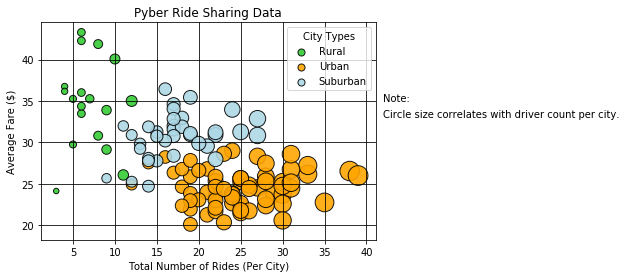

In [31]:
# Show plot
plt.grid(b=True, which='major', color='black', linestyle='-')

rural = plt.scatter(rural_x, rural_y, marker="o", facecolors="limegreen", edgecolors="black",
            s= (rural_x * 10), alpha =0.89, label="Rural")
urban = plt.scatter(urban_x, urban_y, marker="o", facecolors="orange", edgecolors="black",
           s= (urban_x * 10), alpha =0.89, label= "Urban")
suburban = plt.scatter(sub_x, sub_y, marker="o", facecolors="lightblue", edgecolors="black",
           s=(sub_x * 10), alpha=0.89, label="Suburban")

legend = plt.legend(loc='best', title="City Types", scatterpoints=1, fontsize=10)
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
plt.text(42,35,'Note:',horizontalalignment='left')
plt.text(42,33,'Circle size correlates with driver count per city.',horizontalalignment='left')
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.savefig("../Images/PyberScatter.png")
plt.show()



## Total Fares by City Type

In [27]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure




In [10]:
fare =groupby_data["fare"].sum()
urban_fare = fare["Urban"].sum()
sub_fare = fare["Suburban"].sum()
rural_fare = fare["Rural"].sum()
urban_fare = urban_fare / fare.sum() *100
sub_fare = sub_fare / fare.sum() * 100
rural_fare = rural_fare / fare.sum() * 100
fares = [urban_fare, sub_fare, rural_fare]
colors =["orange", "lightblue", "limegreen"]
explode=[0.1, 0, 0]
labels = ["Urban", "Suburban", "Rural"]

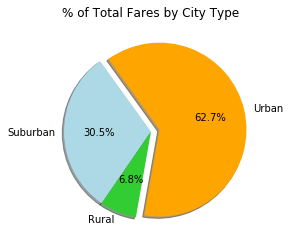

In [21]:
plt.pie(fares, explode = explode, labels = labels, colors = colors,
       autopct="%1.1f%%", shadow = True, startangle = -100)
plt.title("% of Total Fares by City Type")
plt.savefig("../Images/TotalFaresPy.png")
plt.show()

## Total Rides by City Type

In [23]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure
x = groupby_data["type"].count()
urban_x = x['Urban']
sub_x = x['Suburban']
rural_x = x['Rural']

urban_ride = urban_x.sum() / x.sum() * 100
sub_ride = sub_x.sum()/ x.sum() * 100
rural_ride = rural_x.sum() / x.sum() * 100 
ride_type = [urban_ride, sub_ride, rural_ride]
colors =["orange", "lightblue", "limegreen"]
explode=[0.1, 0, 0]
labels = ["Urban", "Suburban", "Rural"]


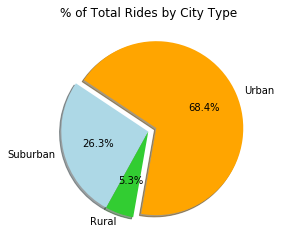

In [24]:
plt.pie(ride_type, explode = explode, labels = labels, colors = colors,
       autopct="%1.1f%%", shadow = True, startangle = -100)
plt.title("% of Total Rides by City Type")
plt.savefig("../Images/TotalRidesPy.png")
plt.show()

## Total Drivers by City Type

In [35]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [17]:
x = groupby_data["driver_count"].mean()
urban_x = x['Urban']
sub_x = x['Suburban']
rural_x = x['Rural']

urban_driver = urban_x.sum() / x.sum() * 100
sub_driver = sub_x.sum()/ x.sum() * 100
rural_driver = rural_x.sum() / x.sum() * 100 
driver_type = [urban_driver, sub_driver, rural_driver]
colors =["orange", "lightblue", "limegreen"]
explode=[0.1, 0, 0]
labels = ["Urban", "Suburban", "Rural"]



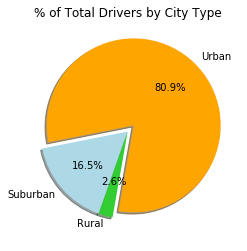

In [25]:
plt.pie(driver_type, explode = explode, labels = labels, colors = colors,
       autopct="%1.1f%%", shadow = True, startangle = -100)
plt.title("% of Total Drivers by City Type")
plt.savefig("../Images/TotalDriverPy.png")
plt.show()

In [ ]:
# Some Trends
# 1. The more riders there are the more drivers there are which is why the urban area has the most of both
# 2. The average Fare amount has an inverse relationship with total number of rides
        # the larger the population is the lower the fares
# 3. The lower the population of riders the higher the fare seem to be